# SQLite 常用命令
---

<font size=3>**本课内容：**</font>


**1. DDL-数据定义语言**
- 创建表 CREATE
- 修改表 ALTER
- 删除表 DROP


**2. DML-数据操作语言**
- 插入数据 INSERT
- 更新数据 UPDATE
- 删除数据 DELETE


**3. DQL-数据查询语言**
- 查询数据 SELECT

---

## 1. DDL - 数据定义语言

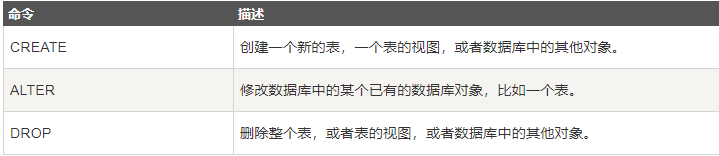

### 1.1. 创建表 CREATE

#### 1.1.1. 方法一：DB Browser 界面创建新表

最简单的方式，直接在 DB Browser 界面通过“创建表”按钮来创建一个新表：

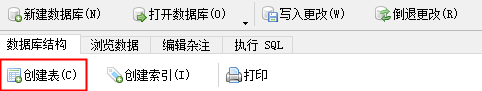

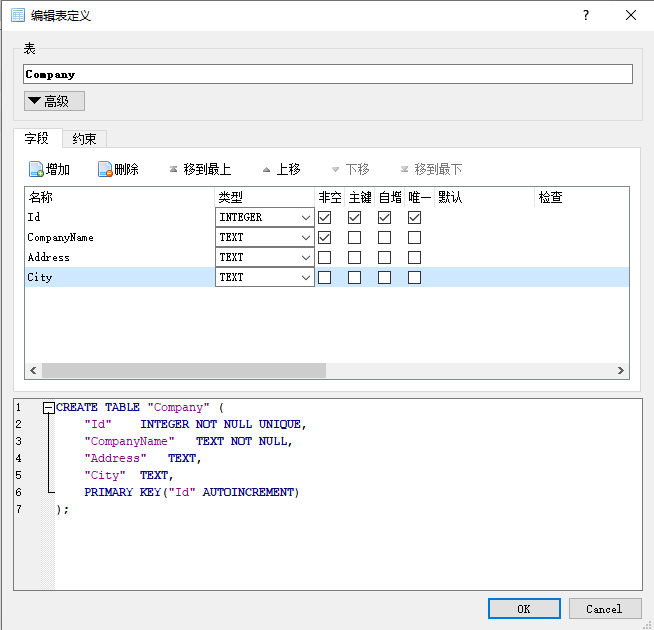

#### 1.1.2. 方法二：执行 SQL 创建新表

SQLite 的 CREATE TABLE 语句用于在任何给定的数据库创建一个新表。

创建基本表，涉及到命名表、定义列及每一列的数据类型。

**语法**

CREATE TABLE 语句的基本语法如下：

    CREATE TABLE table_name (
       column1 datatype PRIMARY KEY,
       column2 datatype,
       column3 datatype,
       ...
       columnN datatype
    );

**实例**

例如，创建新表 Company 并增加四列：

    CREATE TABLE Company (
        Id INTEGER PRIMARY KEY AUTOINCREMENT,
        CompanyName TEXT NOT NULL,
        Address TEXT,
        City TEXT
    );
    
其中，ID 一列数据类型为整数，同时为主键自增；CompanyName 一列为非空文本；Address 和 City 列的数据类型为文本。

**注意**

通常会在创建新表之前新增删除表的操作：

    DROP TABLE IF EXISTS table_name;

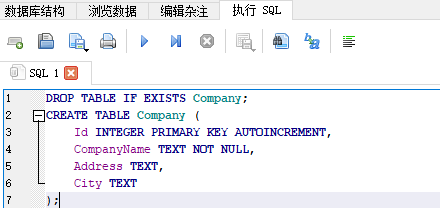

---
#### 1.1.3. 方法三：通过 sqlite3 模块创建新表

In [1]:
import sqlite3

# 创建数据库连接，如没有该数据库则创建一个新的数据库
conn = sqlite3.connect('new_database.sqlite')
# 创建光标
cur = conn.cursor()

# 初始化表格，删除已有表格
drp_tb_sql = "DROP TABLE IF EXISTS Company"

# 使用跨行字符串实现多行命令
crt_tb_sql = '''
CREATE TABLE Company (
    Id INTEGER PRIMARY KEY AUTOINCREMENT,
    CompanyName TEXT NOT NULL,
    Address TEXT,
    City TEXT
)'''

# 使用光标执行命令
cur.execute(drp_tb_sql)
cur.execute(crt_tb_sql)

# 保存修改
conn.commit()
# 关闭连接
conn.close()

**注意**

建议不要同时使用 DB Brower 和 Python 进行操作，以防操作冲突。

---
### SQLite 约束

约束是在表的数据列上强制执行的规则。这些是用来限制可以插入到表中的数据类型。这确保了数据库中数据的准确性和可靠性。

约束可以是列级或表级。列级约束仅适用于列，表级约束被应用到整个表。

以下是在 SQLite 中常用的约束。

**NOT NULL** 约束：确保某列不能有 NULL 值。

**DEFAULT** 约束：当某列没有指定值时，为该列提供默认值。

**UNIQUE** 约束：确保某列中的所有值是不同的。

**PRIMARY KEY** 约束：唯一标识数据库表中的各行/记录。

**CHECK** 约束：CHECK 约束确保某列中的所有值满足一定条件。

#### NOT NULL 约束

默认情况下，列可以保存 NULL 值。如果您不想某列有 NULL 值，那么需要在该列上定义此约束，指定在该列上不允许 NULL 值。

NULL 与没有数据是不一样的，它代表着未知的数据。

**实例**

例如，下面的 SQLite 语句创建一个新的表 Company，并增加了四列，其中 CompanyName 列指定不接受 NULL 值：

    CREATE TABLE Company (
        Id INTEGER PRIMARY KEY AUTOINCREMENT,
        CompanyName TEXT NOT NULL,
        Address TEXT,
        City TEXT
    );

#### DEFAULT 约束

DEFAULT 约束在 INSERT INTO 语句没有提供一个特定的值时，为列提供一个默认值。

**实例**

例如，下面的 SQLite 语句创建一个新的表 Company，并增加了四列。其中，City 列默认设置为 Shanghai。所以当 INSERT INTO 语句没有为该列提供值时，该列将被设置为 Shanghai。
    
    CREATE TABLE Company (
        Id INTEGER PRIMARY KEY AUTOINCREMENT,
        CompanyName TEXT NOT NULL,
        Address TEXT,
        City TEXT DEFAULT Shanghai
    );

#### UNIQUE 约束

UNIQUE 约束防止在一个特定的列存在两个记录具有相同的值。

**实例**

例如，下面的 SQLite 语句创建一个新的表 Company，并增加了四列。其中，CompanyName 一列设置为 UNIQUE，防止出现两个相同的公司名称。

    CREATE TABLE Company (
        Id INTEGER PRIMARY KEY AUTOINCREMENT,
        CompanyName TEXT NOT NULL UNIQUE,
        Address TEXT,
        City TEXT DEFAULT Shanghai
    );

#### PRIMARY KEY 约束

PRIMARY KEY 约束唯一标识数据库表中的每个记录。

在一个表中可以有多个 UNIQUE 列，但只能有一个主键，主键是唯一的 ID。

**实例**

已经看到了我们创建以 Id 作为主键的 Company 表的各种实例：

    CREATE TABLE Company (
        Id INTEGER PRIMARY KEY AUTOINCREMENT,
        CompanyName TEXT NOT NULL UNIQUE,
        Address TEXT,
        City TEXT DEFAULT Shanghai
    );

#### CHECK 约束

CHECK 约束启用输入一条记录要检查值的条件。如果条件值为 False，则记录违反了约束，且不能输入到表。

**实例**

例如，下面的 SQLite 创建一个新的表 Company，并增加了五列。

在这里，我们为 Size 列（员工数量）添加 CHECK，即员工数必须大于零。

    CREATE TABLE Company (
        Id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        CompanyName TEXT NOT NULL UNIQUE,
        Address TEXT,
        City TEXT DEFAULT Shanghai,
        Size INTEGER CHECK (Size > 0)
    );

### 1.2. 修改表 ALTER

在 SQLite 中，ALTER TABLE 命令允许用户重命名表，或向现有表添加一个新的列。

#### 1.2.1. 重命名表 RENAME TO

用来重命名已有的表的 ALTER TABLE 的基本语法如下：

    ALTER TABLE table_name RENAME TO new_table_name;

**实例**

将表 Company 改名为 NewCompany：

    ALTER TABLE Company RENAME TO NewCompany;

In [2]:
# 创建数据库连接，如没有该数据库则创建一个新的数据库
conn = sqlite3.connect('new_database.sqlite')
# 创建光标
cur = conn.cursor()

# 使用光标执行命令
cur.execute("ALTER TABLE Company RENAME TO NewCompany")

# 保存修改
conn.commit()
# 由于还有后续操作，可以暂时不关闭连接，最后一步再关闭

此时数据表名改为 NewCompany：

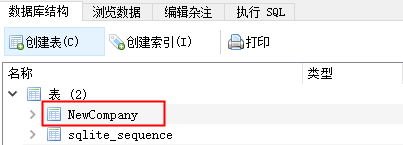

#### 1.2.2. 新增列 ADD COLUMN

用来在已有的表中添加一个新的列的 ALTER TABLE 的基本语法如下：

    ALTER TABLE table_name ADD COLUMN new_column datatype;
    
**实例**

现在，让我们尝试在 NewCompany 表中添加一个新的列，如下所示：

    ALTER TABLE NewCompany ADD COLUMN Industry TEXT;
    
请注意，新添加的列是以 NULL 值来填充的。

In [3]:
# 连接没有关闭，不需要重复创建连接
# 使用光标执行命令
cur.execute("ALTER TABLE NewCompany ADD COLUMN Industry TEXT")

# 保存修改
conn.commit()
# 暂时不用关闭连接

此时数据表新增一列 Industry：

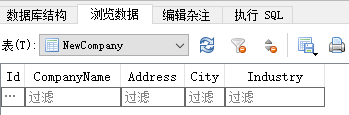

### 1.3. 删除表 DROP

SQLite 的 DROP TABLE 语句用来删除表定义及其所有相关数据、索引、触发器、约束和该表的权限规范。

使用此命令时要特别注意，因为一旦一个表被删除，表中所有信息也将永远丢失。

**语法**

DROP TABLE 语句的基本语法如下：

    DROP TABLE table_name;

为了避免出错通常增加 IF EXISTS 限定：

    DROP TABLE IF EXISTS table_name;
    
通常用于初始化表格：

    DROP TABLE IF EXISTS table_name;
    CREATE TABLE table_name(
       column1 datatype PRIMARY KEY,
       column2 datatype,
       column3 datatype,
       ...
       columnN datatype
    );

**实例**

初始化数据表 Company：

    DROP TABLE IF EXISTS Company;
    CREATE TABLE Company (
        Id INTEGER PRIMARY KEY AUTOINCREMENT,
        CompanyName TEXT NOT NULL,
        Address TEXT,
        City TEXT
    );

## 2. DML - 数据操作语言

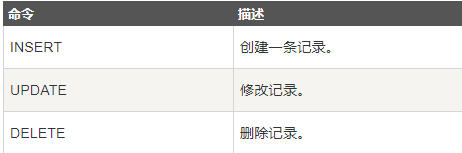

### 2.1. 插入数据 INSERT

SQLite 的 INSERT INTO 语句用于向数据库的某个表中添加新的数据行。

INSERT INTO 语句有两种基本语法。

#### 2.1.1. 语法一，向特定列添加数据

    INSERT INTO table_name (column1, column2, column3,...columnN)
    VALUES (value1, value2, value3,...valueN);
    
在这里，column1, column2,...columnN 是要插入数据的表中的列的名称。

<font size=3>**实例**</font>

假设通过如下 SQL 语句创建一个数据表 Company：

    DROP TABLE IF EXISTS Company;
    CREATE TABLE Company (
        Id INTEGER PRIMARY KEY AUTOINCREMENT,
        CompanyName TEXT NOT NULL,
        Address TEXT,
        City TEXT DEFAULT Shanghai
    );

向表中添加一条新的记录：

    INSERT INTO Company (CompanyName) VALUES ('ABC');

In [4]:
# 初始化表 Company
drp_tb_sql = "DROP TABLE IF EXISTS Company"
crt_tb_sql = """
CREATE TABLE Company (
    Id INTEGER PRIMARY KEY AUTOINCREMENT,
    CompanyName TEXT NOT NULL,
    Address TEXT,
    City TEXT DEFAULT Shanghai
)"""
cur.execute(drp_tb_sql)
cur.execute(crt_tb_sql)

# 插入一条数据
cur.execute("INSERT INTO Company (CompanyName) VALUES ('ABC')")

# 保存修改
conn.commit()

浏览数据表 Company 则能看到刚刚添加的一条记录：
    
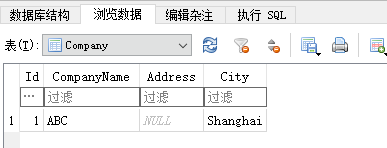

#### 2.1.2. 语法二，向所有列添加数据

如果要为表中的所有列添加值，您也可以不需要在 SQLite 查询中指定列名称，但要确保值的顺序与列在表中的顺序一致。

    INSERT INTO table_name VALUES (value1,value2,value3,...valueN);

**实例**

    INSERT INTO Company VALUES (2,'SUN',NULL,'Beijing');

In [5]:
# 插入一条数据
cur.execute("INSERT INTO Company VALUES (2,'SUN',NULL,'Beijing')")

# 保存修改
conn.commit()

浏览数据表 Company 则能看到刚刚添加的一条记录：

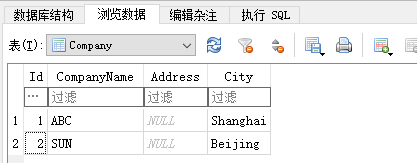

#### 2.1.3. 语法三：使用 ？ 占位

In [6]:
# 初始化表格
cur.execute(drp_tb_sql)
cur.execute(crt_tb_sql)

# 添加新记录，可以使用 ？ 占位
insert_sql = '''
INSERT INTO Company (CompanyName, Address, City) 
VALUES (?,?,?)
'''
cur.execute(insert_sql,('ABC','淮海中路999号','上海'))
cur.execute(insert_sql,('XYZ','大栅栏街1号','北京'))

# 保存修改
conn.commit()

结果如下：

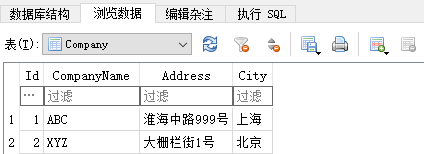

### 2.2. 更新数据 UPDATE

SQLite 的 DELETE 查询用于删除表中已有的记录。

可以使用带有 WHERE 子句的 DELETE 查询来删除选定行，否则所有的记录都会被删除。

**语法**

带有 WHERE 子句的 UPDATE 查询的基本语法如下：

    UPDATE table_name
    SET column1 = value1, column2 = value2...., columnN = valueN
    WHERE [condition];

**实例**

将上述数据表 Company 中城市为 “上海” 的地址设为 “华东”。

    UPDATE Company
    SET Address = '华东'
    WHERE City='上海';

In [7]:
# 将城市为 “上海” 的地址更新为 “华东”
update_sql = """
UPDATE Company
SET Address = '华东'
WHERE City = '上海'
"""
cur.execute(update_sql)

# 保存修改
conn.commit()

修改后的数据表如下：

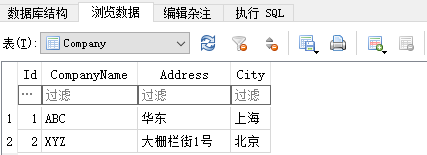

### 2.3. 删除数据 DELETE

SQLite 的 DELETE 查询用于删除表中已有的记录。

可以使用带有 WHERE 子句的 DELETE 查询来删除选定行，否则所有的记录都会被删除。

**语法**

带有 WHERE 子句的 DELETE 查询的基本语法如下：

    DELETE FROM table_name
    WHERE [condition];

**实例**

删除上表中城市为 “上海” 的数据：

    DELETE FROM Company 
    WHERE City = '上海';

In [8]:
# 删除表 Company 中城市为 “上海” 的数据
delete_sql = """
DELETE FROM Company 
WHERE City = '上海'
"""
cur.execute(delete_sql)

# 保存修改
conn.commit()

删除后表格如下：

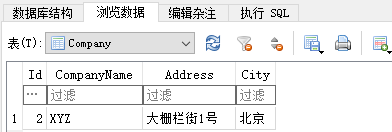

如果要删除表中所有数据，则不需要使用 WHERE 进行限定：

    DELETE FROM Company;

In [9]:
# 删除表中所有数据
delete_sql = "DELETE FROM Company"
cur.execute(delete_sql)

# 保存修改
conn.commit()

删除后表格如下：

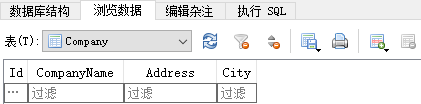

**注意**

UPDATE 和DELETE 是永久性的，无法撤销和返回的，所以一定要备份；当然如果没有保存也不会删除。

In [10]:
# 关闭数据库连接
conn.close()

## 3. DQL - 数据查询语言

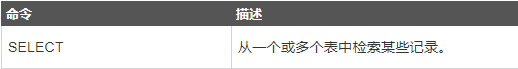

### 3.1. 查询数据 SELECT

SQLite 的 SELECT 语句用于从 SQLite 数据库表中获取数据，以结果表的形式返回数据。这些结果表也被称为结果集。

**语法**

SQLite 的 SELECT 语句的基本语法如下：

    SELECT column1, column2, columnN FROM table_name;

在这里，column1, column2...是表的字段，他们的值即是您要获取的。如果您想获取所有可用的字段，那么可以使用下面的语法：

    SELECT * FROM table_name;

In [14]:
# 创建 Northwind 数据库连接
conn = sqlite3.connect('Northwind_small.sqlite')
# 创建光标
cur = conn.cursor()

# 获取产品表格中的所有数据
cur.execute("SELECT * FROM Product")

# 获取数据
for row in cur:
    print(row)

(1, 'Chai', 1, 1, '10 boxes x 20 bags', 18, 39, 0, 10, 0)
(2, 'Chang', 1, 1, '24 - 12 oz bottles', 19, 17, 40, 25, 0)
(3, 'Aniseed Syrup', 1, 2, '12 - 550 ml bottles', 10, 13, 70, 25, 0)
(4, "Chef Anton's Cajun Seasoning", 2, 2, '48 - 6 oz jars', 22, 53, 0, 0, 0)
(5, "Chef Anton's Gumbo Mix", 2, 2, '36 boxes', 21.35, 0, 0, 0, 1)
(6, "Grandma's Boysenberry Spread", 3, 2, '12 - 8 oz jars', 25, 120, 0, 25, 0)
(7, "Uncle Bob's Organic Dried Pears", 3, 7, '12 - 1 lb pkgs.', 30, 15, 0, 10, 0)
(8, 'Northwoods Cranberry Sauce', 3, 2, '12 - 12 oz jars', 40, 6, 0, 0, 0)
(9, 'Mishi Kobe Niku', 4, 6, '18 - 500 g pkgs.', 97, 29, 0, 0, 1)
(10, 'Ikura', 4, 8, '12 - 200 ml jars', 31, 31, 0, 0, 0)
(11, 'Queso Cabrales', 5, 4, '1 kg pkg.', 21, 22, 30, 30, 0)
(12, 'Queso Manchego La Pastora', 5, 4, '10 - 500 g pkgs.', 38, 86, 0, 0, 0)
(13, 'Konbu', 6, 8, '2 kg box', 6, 24, 0, 5, 0)
(14, 'Tofu', 6, 7, '40 - 100 g pkgs.', 23.25, 35, 0, 0, 0)
(15, 'Genen Shouyu', 6, 2, '24 - 250 ml bottles', 15.5, 39, 0, 5,

In [15]:
# 获取产品表格中产品名称和产品单价数据
cur.execute("SELECT ProductName,UnitPrice FROM Product")

# 获取数据
for name,price in cur:
    print(name,price)

Chai 18
Chang 19
Aniseed Syrup 10
Chef Anton's Cajun Seasoning 22
Chef Anton's Gumbo Mix 21.35
Grandma's Boysenberry Spread 25
Uncle Bob's Organic Dried Pears 30
Northwoods Cranberry Sauce 40
Mishi Kobe Niku 97
Ikura 31
Queso Cabrales 21
Queso Manchego La Pastora 38
Konbu 6
Tofu 23.25
Genen Shouyu 15.5
Pavlova 17.45
Alice Mutton 39
Carnarvon Tigers 62.5
Teatime Chocolate Biscuits 9.2
Sir Rodney's Marmalade 81
Sir Rodney's Scones 10
Gustaf's Knäckebröd 21
Tunnbröd 9
Guaraná Fantástica 4.5
NuNuCa Nuß-Nougat-Creme 14
Gumbär Gummibärchen 31.23
Schoggi Schokolade 43.9
Rössle Sauerkraut 45.6
Thüringer Rostbratwurst 123.79
Nord-Ost Matjeshering 25.89
Gorgonzola Telino 12.5
Mascarpone Fabioli 32
Geitost 2.5
Sasquatch Ale 14
Steeleye Stout 18
Inlagd Sill 19
Gravad lax 26
Côte de Blaye 263.5
Chartreuse verte 18
Boston Crab Meat 18.4
Jack's New England Clam Chowder 9.65
Singaporean Hokkien Fried Mee 14
Ipoh Coffee 46
Gula Malacca 19.45
Rogede sild 9.5
Spegesild 12
Zaanse koeken 9.5
Chocolade 12.7

In [16]:
# 也可以结合 pandas 模块将结果转为 DataFrame 格式
import pandas as pd 

pd.read_sql("SELECT ProductName,UnitPrice FROM Product", con=conn)

,ProductName,UnitPrice
0,Chai,18.00
1,Chang,19.00
2,Aniseed Syrup,10.00
3,Chef Anton's Cajun Seasoning,22.00
4,Chef Anton's Gumbo Mix,21.35
...,...,...
72,Röd Kaviar,15.00
73,Longlife Tofu,10.00
74,Rhönbräu Klosterbier,7.75
75,Lakkalikööri,18.00


In [17]:
# 关闭连接
conn.close()

声明：本资料仅限内部研究和交流使用，切勿外传。